# Introduction : 

> What is feature extraction ?

- `Feature Extraction` refers to conversion of text to numerical form so that maschine can make it understable and predict output.. It is also sometime called as Text Representation and Text Vectorization...

> Why do you need it ?
- Better feature you input , better output it will gave you..

> Why is it difficult?
- Conversion of text to numerical is relatively complex , and although sometime it also need to give creative features by yourself

> List of Ideas and Techniques

- `Applications :`
    - `Digit Recognition`
    - `Voice to Sentiment Recognition`

>

- `Techniques Used :`
    - `One hot Encoding`(Basic)
    - `Bag of Words`(Intermediate)
    - `Ngrams`
    - `Tf/Idf`
    - `Custom Features`

##  Basic Terms 

 -`Corpus`         -`Vocabulary`         -`Document`         -`Word` 


### What is Corpus?
- When u combine all the words of a given feature of `dataset` (C).

### What is Vocabulary?
- Extracting all the unique words from the corpus is termed as `Vocabulary` (V).

### What is Document?
- Each row of feature coloumn is termed as `Document` (D).

### What is Word?
- Each word of `Document` is termed as `Word` (W).





# ONE HOT ENCODING

Let suppose we have a sample dataset with 4 documents

- `D1 | "When I couldn't find hand sanitizer at Fred Meyer, I turned to Amazon. But $114.97 for a 2 pack of Purell??!!"`

- `D2 | "Find out how you can protect yourself and loved ones from coronavirus. ?"`

- `D3 | "Spiking prices during a state of emergency is a crim"`

- `D4 | "Stay vigilant, stay safe. As we adapt to COVID-19, know that our office is here for you."`




This Process refers to conversion of text to vectors form to let maschine understand inout in terms of vector

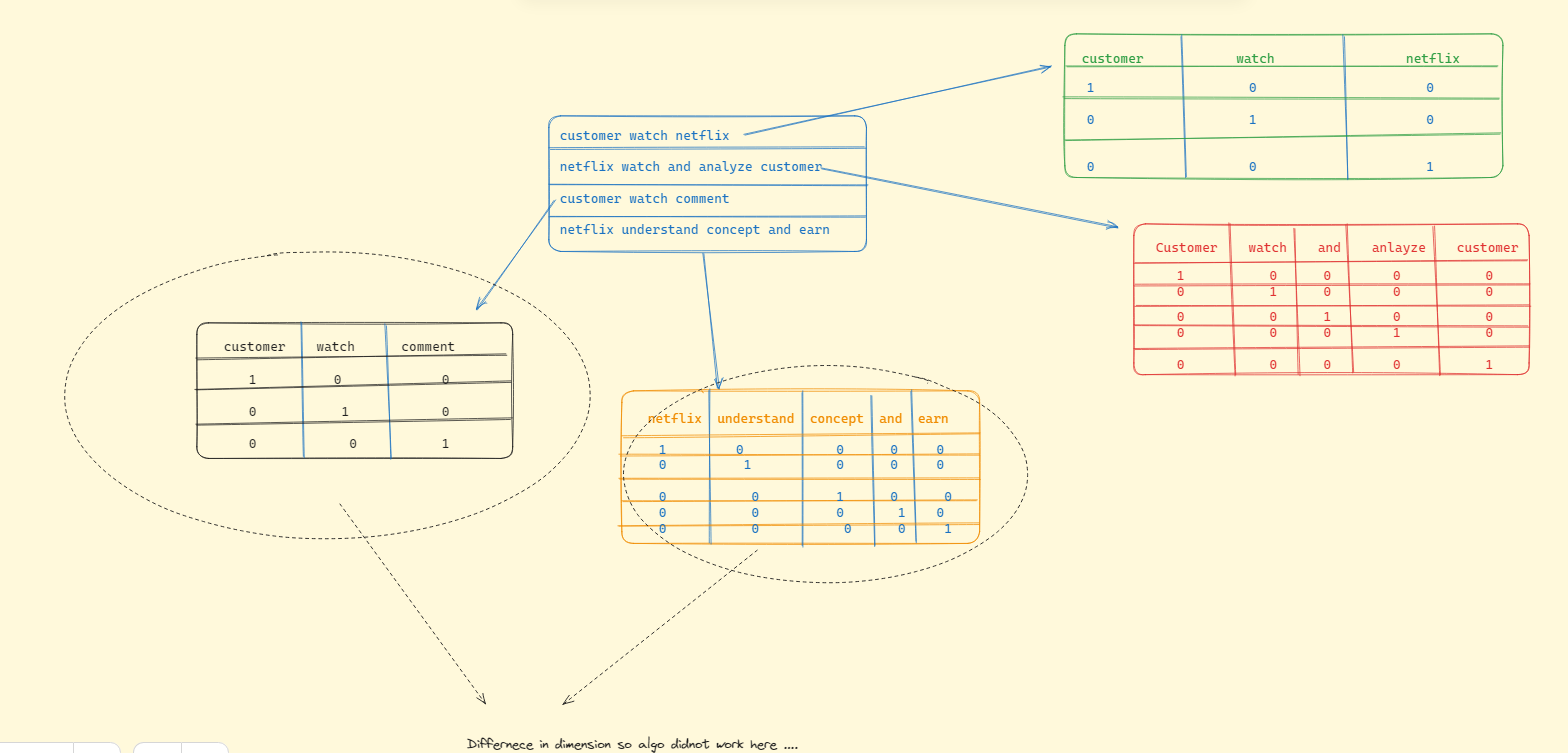

In [2]:
# Creating Corpus of Text
import nltk
import string
punctuations =string.punctuation

text = "When I couldn't find hand sanitizer at Fred Meyer, I turned to Amazon. But $114.97 for a 2 pack of Purell??!!Find out how you can protect yourself and loved ones from coronavirus.Spiking prices during a state of emergency is a crimStay vigilant, stay safe. As we adapt to COVID-19, know that our office is here for you."

text = text.lower() # Lowercasing
corpus = nltk.word_tokenize(text) # Creating custom corpus of given text

corpus= [word.strip('.,!:;()[]?') for word in corpus] # Removing punctuations
corpus = [word.replace("'s",'') for word in corpus]
corpus = [word.replace("n't",'') for word in corpus]
corpus

# Creating Vocabulary

vocab =[]

for word in corpus:
    if word not in vocab:
        vocab.append(word)

vocab.sort()
vocab

['',
 '$',
 '114.97',
 '2',
 'a',
 'adapt',
 'amazon',
 'and',
 'as',
 'at',
 'but',
 'can',
 'coronavirus.spiking',
 'could',
 'covid-19',
 'crimstay',
 'during',
 'emergency',
 'find',
 'for',
 'fred',
 'from',
 'hand',
 'here',
 'how',
 'i',
 'is',
 'know',
 'loved',
 'meyer',
 'of',
 'office',
 'ones',
 'our',
 'out',
 'pack',
 'prices',
 'protect',
 'purell',
 'safe',
 'sanitizer',
 'state',
 'stay',
 'that',
 'to',
 'turned',
 'vigilant',
 'we',
 'when',
 'you',
 'yourself']

In [3]:
# Now we convert vocab into n dimensional vector (called ONE HOT ENCODING)

# Importing libraries
from numpy import array
from numpy import argmax

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Our Vocabulary list 
vocab

# Converting Vocabulary list to array
values = array(vocab)

# print(values)

# Integer encoder Instantiate
label_encoder = LabelEncoder()

# Fiiting values and transforming it 
integer_encoded =label_encoder.fit_transform(values)

# print(integer_encoder)

# Binary encoding the values
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

# Invert
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[18,:])])
print(inverted)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
['find']


## Pros of ONE HOT ENCODING          

- `Intutive`         

- `Easy to implement`



## Flaws of ONE HOT ENCODING

- `Sparsity` -> With real world data, Vocab increases heavily which becomes a complex one hot encoding results in sparse array which leads to Overfitting

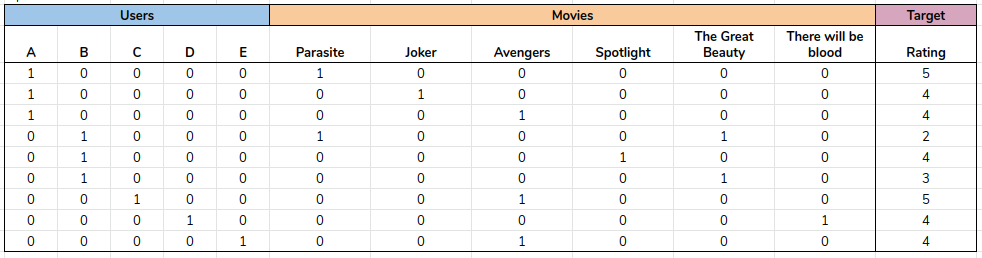

- `No Fixed Size` -> It only works when every coloumn have identical numerical count of word .
                     Means algorithm not works for unequal word count ..

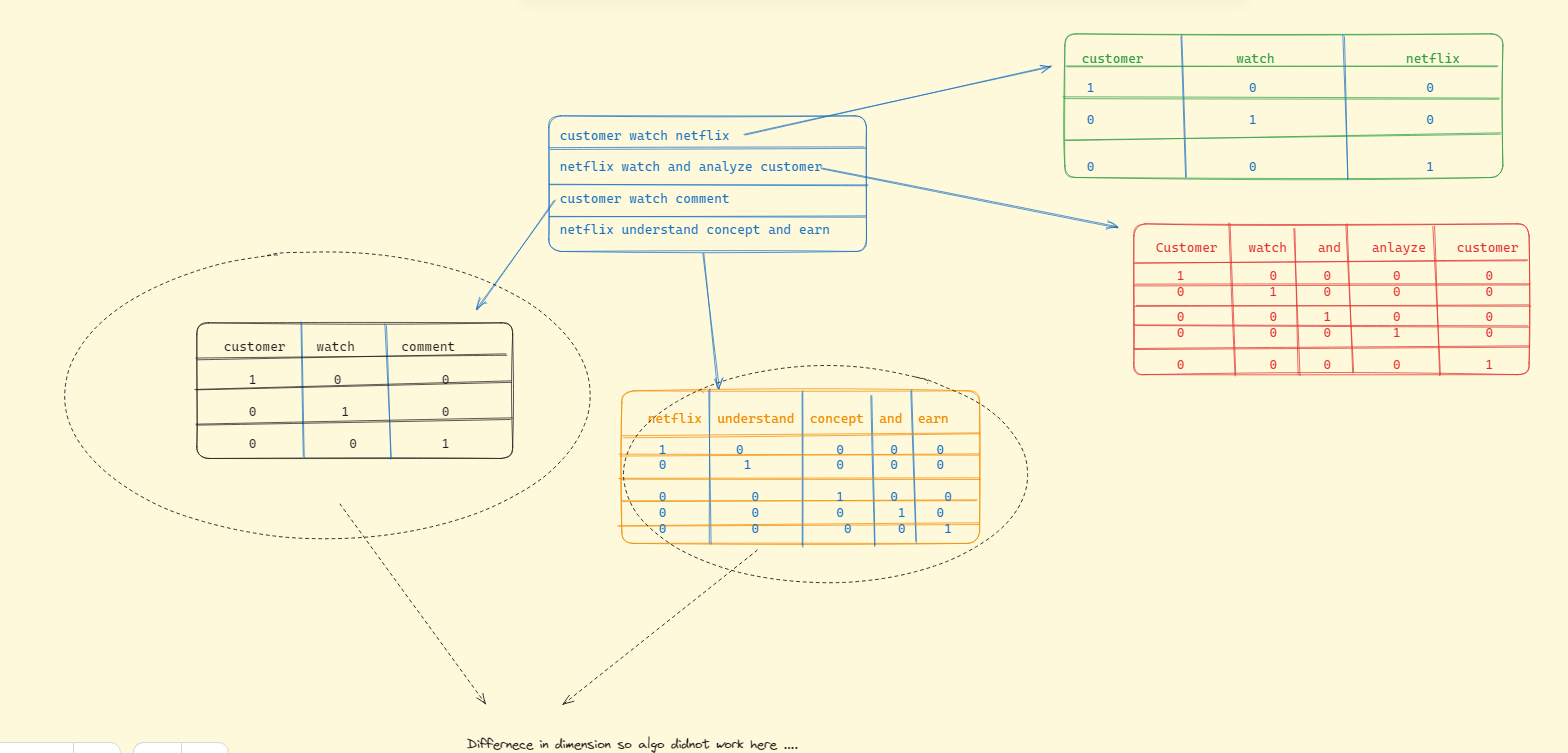

- `OOV( Out of Vocabulary)`

- `No Capturing of Semantic Meaning`

Example -> walk , run , bottle

- TableRepresentation 

  `walk | run | bottle`

  `  1  |  0  |   0   `

  `  0  |  1  |   0   `
  
  `  0  |  0  |   1   `

- Vector format

`walk   = [1,0,0]`

`run    = [0,1,0]`

`bottle = [0,0,1]`

- 3D Visualization of Vectors

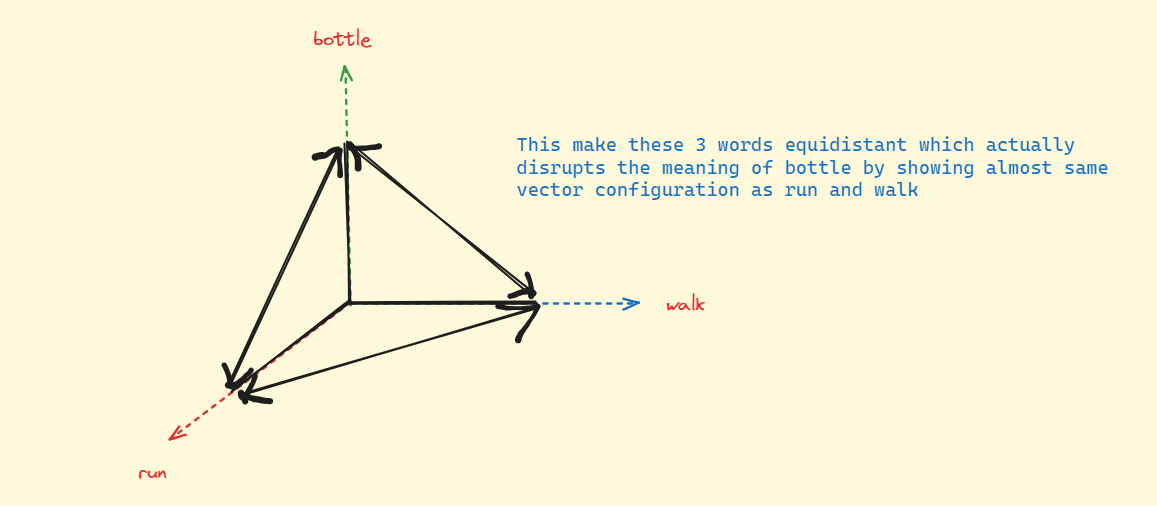

# BAG OF WORDS

### CORE INTUTION 

- `Document related to same category must contain similar words with identical frequency of the category`

- `Order and contextual meaning doesn't matter directly`

### Why called Bag of Word ?

- `Idealogy` people think that they are storing all the word in a container and refering the container to get acknowledge of word and its frequency

### How it works ?
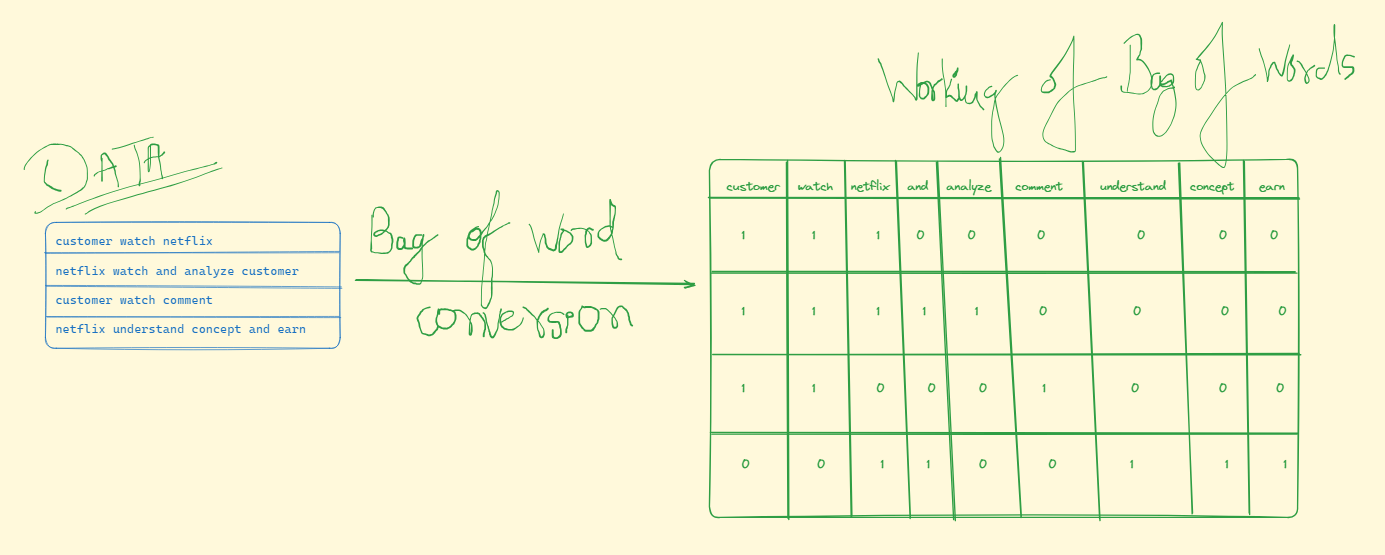

It works like a container which store all the words with respect to their frequency in each document rowwise.


### How we Visualize ?

As our bag of word 9D which is very complex to visualize



In [4]:
# Code Bag of Words

# Importing Libraries
import numpy as np
import pandas as pd

# Sample Data

df= pd.DataFrame({'text':['customer watch netflix','netflix watch and analyze customer','customer watch comment','netflix understand concept and earn'],'label':[1,1,0,1]})
df

# Importing count vectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate object of Countvectorizer
countvectorizer =CountVectorizer()

# Apply it for Sample data 
count_result = countvectorizer.fit_transform(df["text"])

# Getting Vocabulary
print(countvectorizer.vocabulary_)

# Extracting respective binary
print(count_result[0].toarray())
print(count_result[1].toarray())
print(count_result[2].toarray())
print(count_result[3].toarray())

{'customer': 4, 'watch': 8, 'netflix': 6, 'and': 1, 'analyze': 0, 'comment': 2, 'understand': 7, 'concept': 3, 'earn': 5}
[[0 0 0 0 1 0 1 0 1]]
[[1 1 0 0 1 0 1 0 1]]
[[0 0 1 0 1 0 0 0 1]]
[[0 1 0 1 0 1 1 1 0]]


In [5]:
# Bag of words for new text

countvectorizer.transform(["netflix analyze comment and interpret sentiments to earn more "]).toarray()

array([[1, 1, 1, 0, 0, 1, 1, 0, 0]], dtype=int64)

### Advantages Of Bag Of Words

- Simple to implement and understand

- Robust than One hot encoder in case of extra words.


### Disadvantage of Bag Of Words

- Cannot handle Contextual meaning of data.

# N-grams

- It is a modified version of bag of words the only difference is the prevoius technique ( Bag of Word) is not be able to retain contextual information which is overcome by this technique. Here n refers to grouping 


`Example` - bi-gram (two-words grouping), tri-gram(three-words grouping)

![Screenshot 2023-07-04 203426.png](<attachment:Screenshot 2023-07-04 203426.png>)
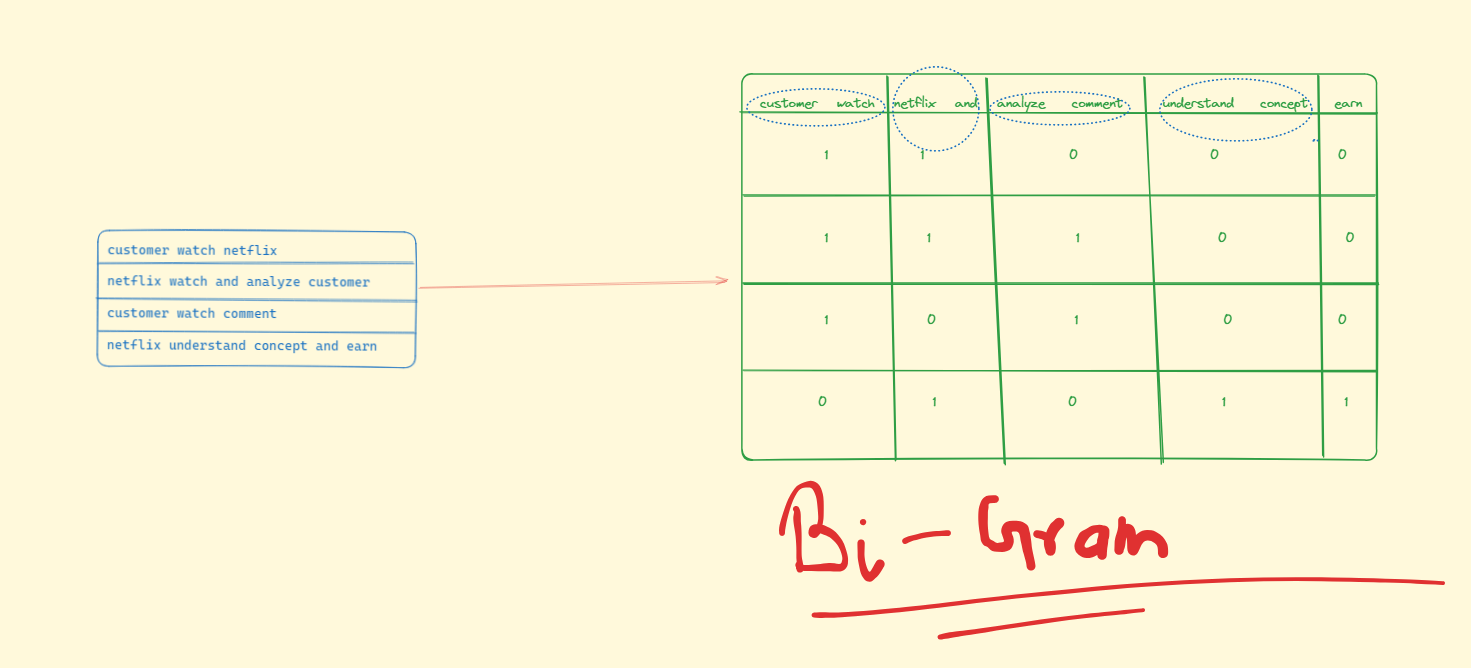

In [6]:
# Implementation of N-grams technique

df= pd.DataFrame({'text':['customer watch netflix','netflix watch and analyze customer','customer watch comment','netflix understand concept and earn'],'label':[1,1,0,1]})
df

# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating object
countvectorizer =CountVectorizer(ngram_range=(2,2)) # Setting up ngram values

# Fitting it in dataframe
bi_gram =countvectorizer.fit_transform(df["text"])

# Extracting Vocabulary
vocab =countvectorizer.vocabulary_
print(vocab)


{'customer watch': 4, 'watch netflix': 10, 'netflix watch': 6, 'watch and': 8, 'and analyze': 1, 'analyze customer': 0, 'watch comment': 9, 'netflix understand': 5, 'understand concept': 7, 'concept and': 3, 'and earn': 2}


# Benifits of using n-gram technique ???

- n-grams have the capablity to to capture semantic information of the sentence ..


>lets understand it with an example case

`Example1 ->` This pen is good

`Example2 ->` This pen is not good


###  Applying BOW(Bag of word) Technique

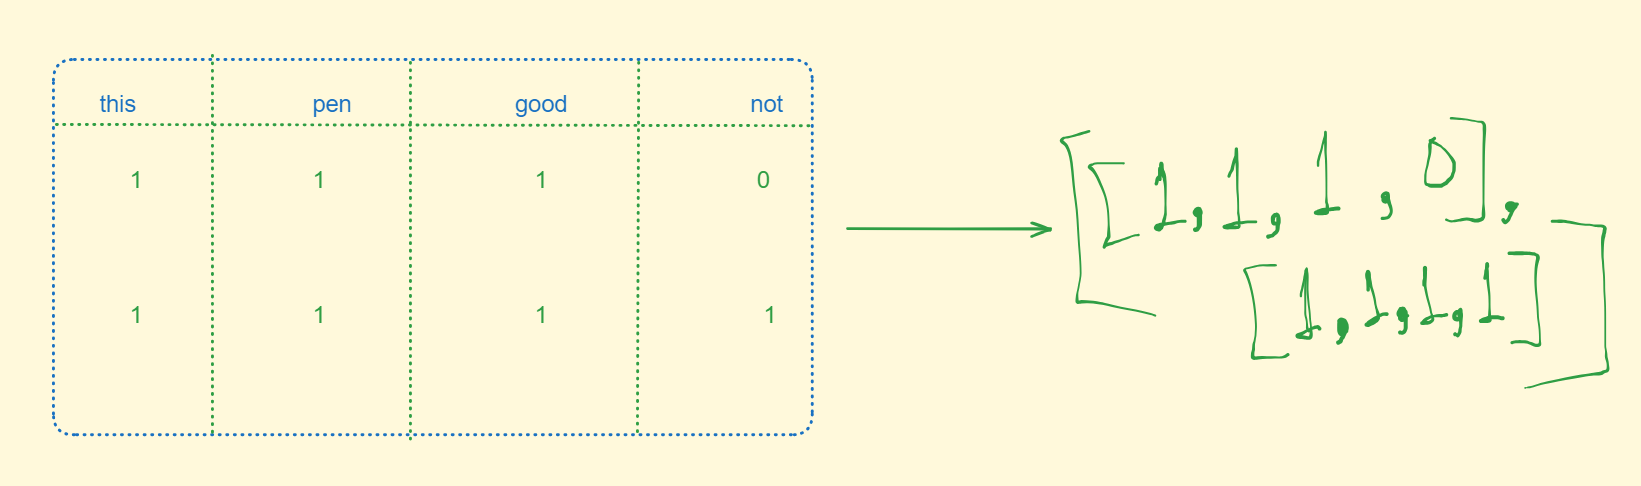

### Visualizing resultant vector

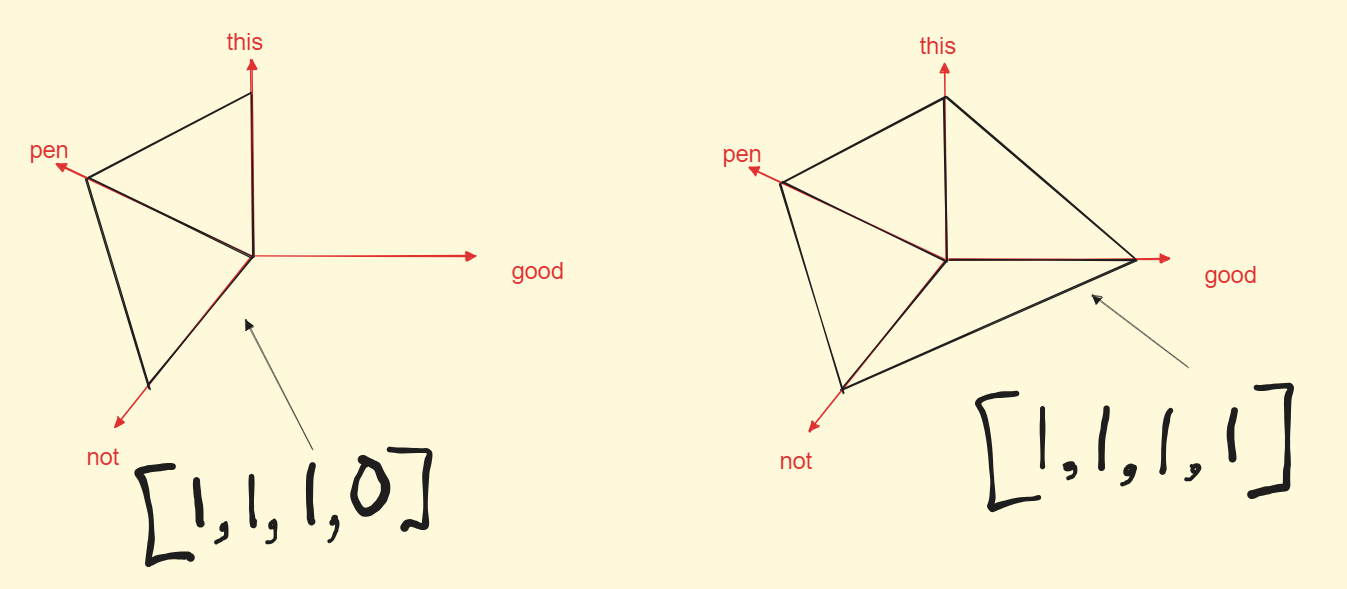

So If we consider these vector spaces, we had noticed that there is such a little difference between them which make them similar due to less distance difference, but in actually they have opposite meaning to each other.This mean BOW technique have no capablity to retain semantic information








### Applying N-gram (bi-gram) Technique 


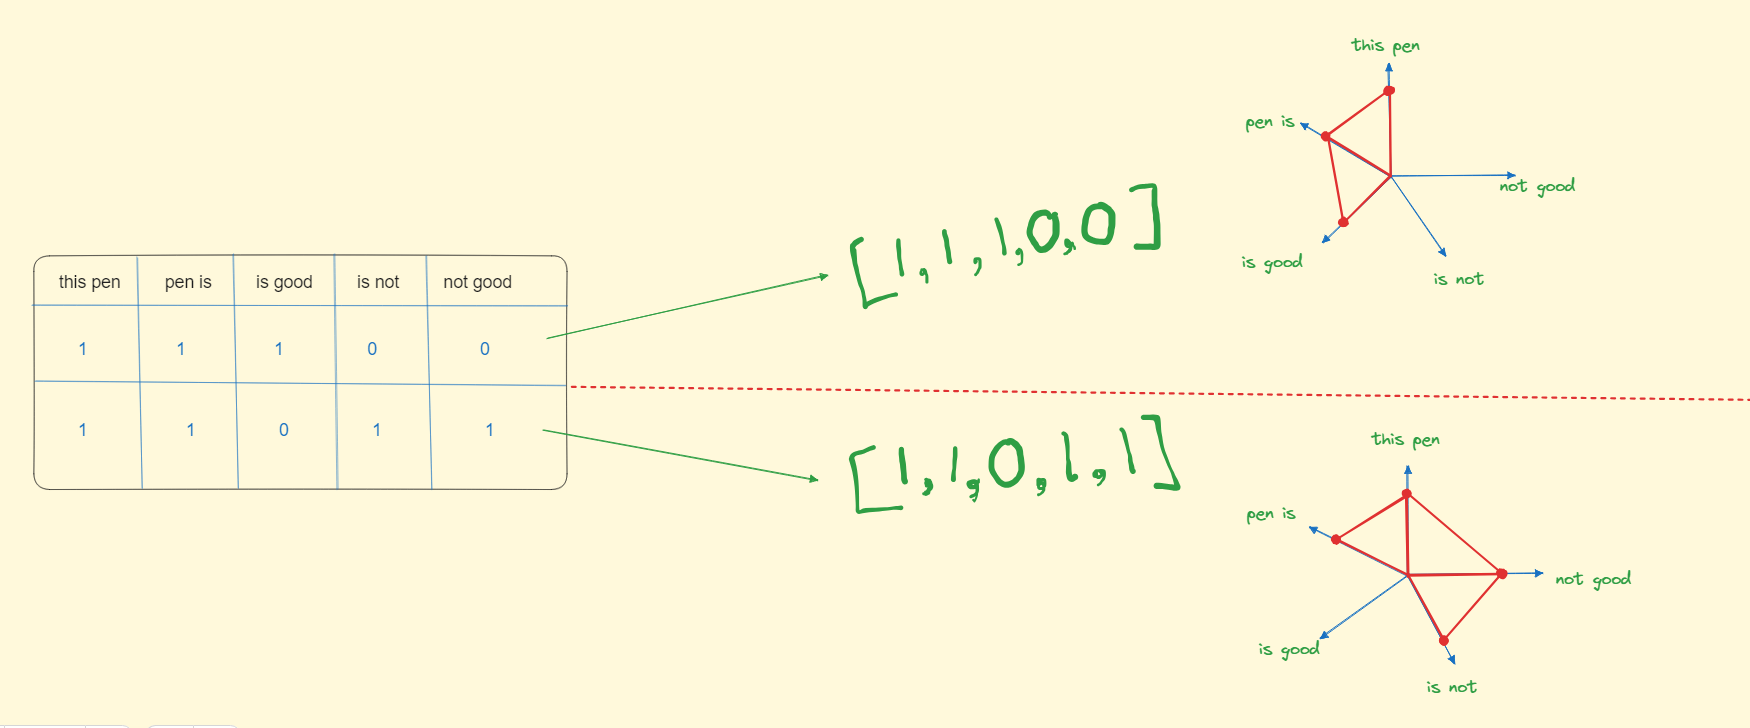

>Bi-gram Technique convert it in 5 dimensional vector spaces which make a lot difference between words. Thats why it works better in retaining semantic information  

>Intutive and easy to implement 


### Disadvantages of N-gram

> Number of token are increased as compared to anagrams for lenght text as it work on combinations of words. due to which dimensionality increases and it affects the complexity and model training time (slow training time due to higher dimensionality).

> It will affects by Out of Vocabulary. Suppose in case if any new word occurs, we have no other option than ignoring the word. 


# Tf-Idf Technique

`Intution`-> A word if occurs most for a particular document but rarely comes in corpus, Then it shows that has high importance related to document 1. Then we will give it a higher score from others.

- To Provide weightage to any particular word, You have to interpret two things first on if Tf`(Term Frequency)` and Idf`(Inverse Document Frequency)` and the resultant as product of both tf and Idf.

-  Formula -> `Weightage of Word` -> ` Frequency of Word` * `Inverse Document Frequency of Word`.


#### How To Interpret Tf(Term Frequency)

- `TF(t,d) = (Number of occurence of term t in document d)/(Total number of terms in document d)`.
- `IDF(t) = loge(Total number of documents in the corpus)/(Number of documents with term t in them)`.

#### Note
    - Inverse Documnet Frequncy(Idf) remains constant while Term Frequency(Tf) varies.  


## Visualization

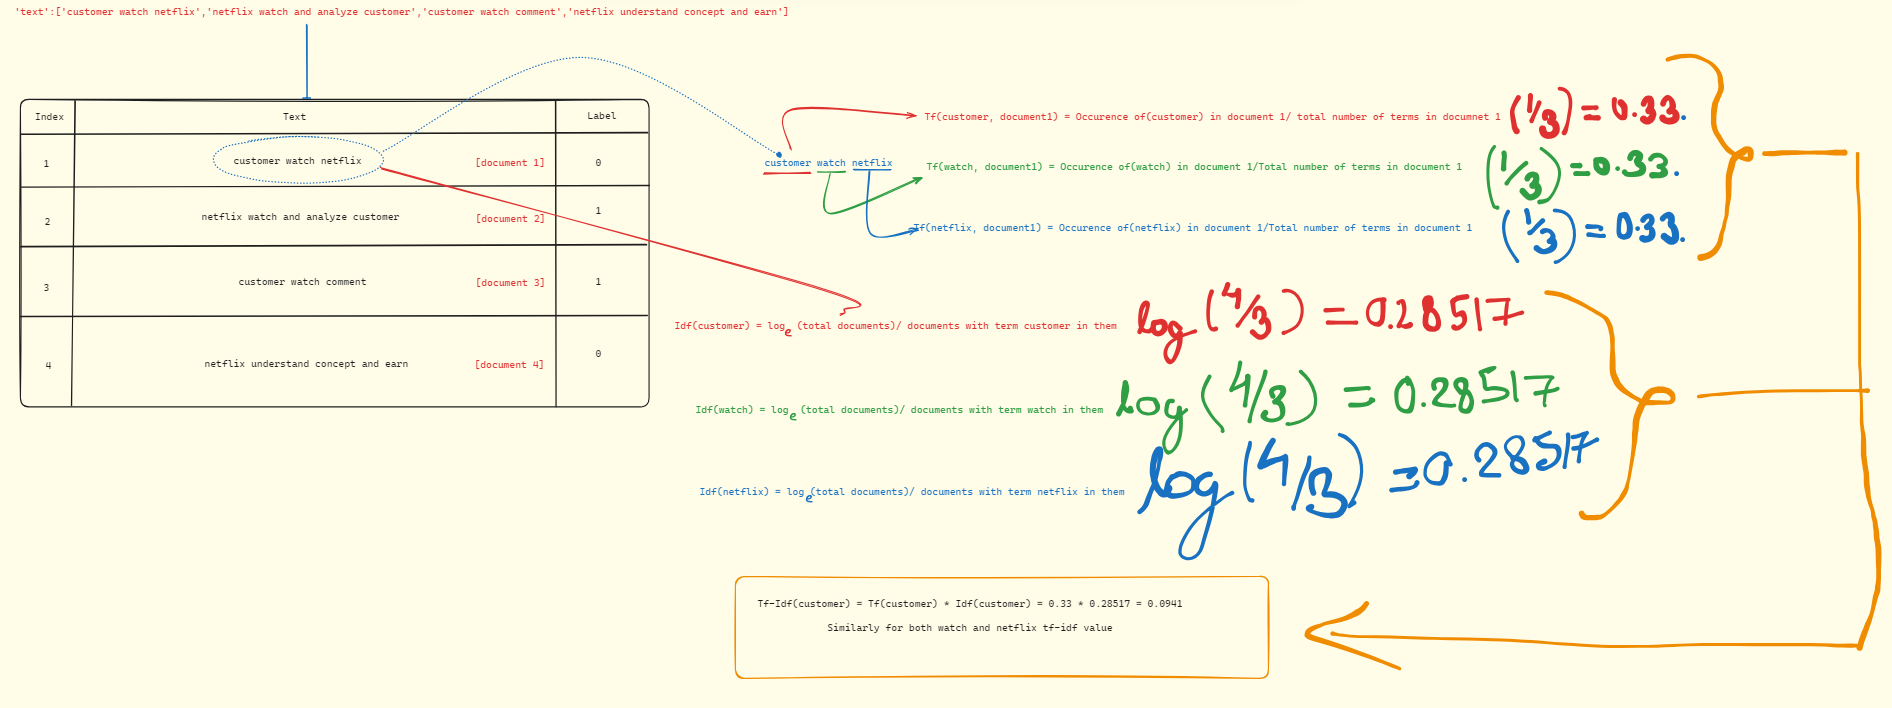

### `Note` 
> - This visual is for simply understand the working of how tf-idf work . It is not work similar to this because tf-idf works on combination range of 3 to 5 words (3-5 Ngrams)

### Documentation Approach

> It seems that values are much different from the given formula .So after referncing to scikit learn documnetation we found that they are adding 1 to the value 

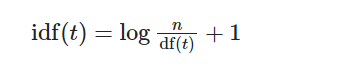

- `Why adding 1 ??`

> Suppose while calculating idf for a term which comes in all documnet result in `0 idf value` which overall means tf-idf gets 0. This means that the term was ignored. To prevent this situation we simple add 1 so we can easily worrk with those situations also.

In [11]:
# Tf-Idf implementation

# Sample Text
df= pd.DataFrame({'text':['customer watch netflix','netflix watch and analyze customer','customer watch comment','netflix understand concept and earn'],'label':[1,1,0,1]})


# Importing libraries for tf idf 
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiating Object
Tf_idf =TfidfVectorizer()

# fitting text to object
Tf_idf.fit_transform(df["text"]).toarray() #It returns Sparse matrix so we convert it to array.

# Cheking term frequency 
print(Tf_idf.idf_)

# Features name
print(Tf_idf.get_feature_names_out())

[1.91629073 1.51082562 1.91629073 1.91629073 1.22314355 1.91629073
 1.22314355 1.91629073 1.22314355]
['analyze' 'and' 'comment' 'concept' 'customer' 'earn' 'netflix'
 'understand' 'watch']


### Advantages Of If-Tdf
        - Most Used In Information retrival engine (eg - Search Engine).

### Disadvantages
        - If Vocabulary is very vast ,it results in sparse matrix.
        - If new word comes ,It cannot handle new word.
        - It cannot capture semantic relation. 

# Custom Feature Creation / Handcrafted Feature

> In easy words, You craft features which suits your requirment 

`Example -> Sentiment Analysis`

- You created some Custom Features like 
        
        - No. of +ve words.
        
        - No. of -ve words.
        
        - Ratio of +ve to -ve words.


It is just for acknowledgment of the topic we have practical implementation on further upcoming projects..